In [ ]:
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv('/content/PBL5recommendationdata.csv',encoding = "latin-1")

# Extract columns 1 to 30 for the Customer DataFrame
customer_df = df.iloc[:, 0:15]
orders_df = df.iloc[:, 15:83]
products_df = df.iloc[:, 83:]

print("Customer DataFrame:")
print(customer_df.head())

print("\nOrders DataFrame:")
print(orders_df.head())

print("\nProducts DataFrame:")
print(products_df.head())


Customer DataFrame:
   Customers.id Customers.fname Customers.lname Customers.company  \
0           797         Christy            Dill          Company0   
1             3            John           Smith          Company1   
2             3            John           Smith          Company1   
3             4           James        Anderson               NaN   
4             5         Abraham          Pollak          Company3   

   Customers.create_date  Customers.status  Customers.mailing  \
0             1426018724               NaN                NaN   
1             1386089139               NaN                NaN   
2             1386089139               NaN                NaN   
3             1386780263               NaN                NaN   
4             1386861599               0.0                0.0   

   Customers.reminders  Customers.tax_exempt  Customers.account_id  \
0                  NaN                   NaN                   NaN   
1                  NaN            

<ipython-input-4-8e443e6a9039>:7: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/PBL5recommendationdata.csv',encoding = "latin-1")


In [ ]:
import sqlite3

# Assuming you have already created the three data frames (customer_df, products_df, and orders_df)

# Create a SQLite database (e.g., 'my_database.db')
db_path = 'my_database.db'

# Connect to the database
conn = sqlite3.connect(db_path)

# Insert the data frames into the database
customer_df.to_sql('Customer', conn, if_exists='replace', index=False)
products_df.to_sql('Products', conn, if_exists='replace', index=False)
orders_df.to_sql('Orders', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

print("Data frames inserted into the SQLite database successfully.")


Data frames inserted into the SQLite database successfully.


In [ ]:

db_path = 'my_database.db'
conn = sqlite3.connect(db_path)

# Query to perform an INNER JOIN on the three tables
query = """
    SELECT *
    FROM Customer
    INNER JOIN Products ON Customer.rowid = Products.rowid
    INNER JOIN Orders ON Customer.rowid = Orders.rowid
"""

# Execute the query and load the results into a pandas DataFrame
merged_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the merged DataFrame
print(merged_df)


      Customers.id Customers.fname Customers.lname Customers.company  \
0              797         Christy            Dill          Company0   
1                3            John           Smith          Company1   
2                3            John           Smith          Company1   
3                4           James        Anderson              None   
4                5         Abraham          Pollak          Company3   
...            ...             ...             ...               ...   
4189          3730            Nora         Fontana              None   
4190          3732        Kennithe          Tecora              None   
4191          3733           Tinna         Randall              None   
4192          3735         HALIMAH          SHAHID              None   
4193          3736         Michael         Kiernan              None   

      Customers.create_date  Customers.status  Customers.mailing  \
0                1426018724               NaN                NaN   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-cef62ce1ca7d>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_characteristics = customer_df.groupby('Cluster').mean()


         Customers.id  Customers.create_date  Customers.status  \
Cluster                                                          
0          906.624053           1.428297e+09               0.0   
1         2500.202487           1.453860e+09               0.0   
2          255.187611           1.405966e+09               0.0   

         Customers.mailing  Customers.tax_exempt  Customers.account_id  \
Cluster                                                                  
0                 0.983696                   NaN                   NaN   
1                 0.983003                   0.2                   NaN   
2                 0.933333                   NaN              7.333333   

         Customers.last_modified  Customers.customer_type  
Cluster                                                    
0                   1.437691e+09                 0.005682  
1                   1.458398e+09                 0.238140  
2                   1.437736e+09                 0.000000 

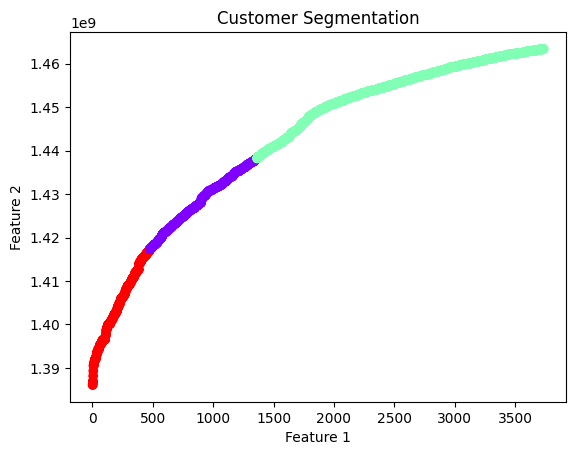

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you already have the customer_df DataFrame
# Prepare the data for clustering by selecting only numeric columns
numeric_columns = customer_df.iloc[:, 0:15].select_dtypes(include=np.number)

# Handle missing values by imputing them with the mean
imputer = SimpleImputer(strategy='mean')
data_for_clustering = imputer.fit_transform(numeric_columns)

# Choose the number of clusters (K)
num_clusters = 3  # You can choose a different number of clusters based on your needs

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Analyze the characteristics of each segment
segment_characteristics = customer_df.groupby('Cluster').mean()

# Display the characteristics of each segment
print(segment_characteristics)

# Optionally, you can plot the clusters for visualization
plt.scatter(data_for_clustering[:, 0], data_for_clustering[:, 1], c=customer_df['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'CustomerID', 'PurchaseDate', and 'Amount'

# Calculate Recency, Frequency, and Monetary for each customer
today = pd.to_datetime('today')
rfm_data = df.groupby('Customers.id').agg({
    #'Customers.last_modified': lambda x: (today - x.max()).days,  # Recency
    'Customers.id': 'count',                            # Frequency
    'Orders.subtotal': 'sum'                                   # Monetary
})

# Rename the columns for better understanding
rfm_data.rename(columns={
    '#Customers.last_modified': 'Recency',
    'Customers.id': 'Frequency',
    'Orders.subtotal': 'Monetary'
}, inplace=True)

# Display the RFM table
print(rfm_data)


              Frequency  Monetary
Customers.id                     
3                     2     88.78
4                     1     19.56
5                     3     95.14
7                     1     39.19
8                     1     59.75
...                 ...       ...
3730                  1     14.85
3732                  1     39.99
3733                  1   1099.00
3735                  1    129.99
3736                  1     24.54

[3054 rows x 2 columns]
